Kate Anderson

 - Logan
 - Ha
 - Pronob

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Thursday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def print_model(bias, Theta, X_names, model_name = None):
    # A function to print the equation of a linear model
    if model_name is None:
        model_str = f'y ='
    else:
        model_str = f'{model_name}:\n y ='

    if not bias==0:
        model_str += f' {bias:.2f}'
        
    for theta, x in zip(Theta, X_names):
        if theta==0:
            continue
        else:
            model_str+= f' + {theta:.2f}*{x}'
    print(model_str)

In [4]:
np.random.seed(15)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=5,    # n_features = 5 --> simple linear regression
                                   noise=10, 
                                   bias = bias, 
                                   random_state=5, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data = X, 
             columns = column_names)
reg_df['y'] = y

#reg_df

In [6]:
# Your code here. Add cells as needed.
x_columns = column_names # defined above

x = reg_df[x_columns]
y = reg_df['y']

# split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# make a linear regression model
model_linreg = LinearRegression() # empty shell of model
model_linreg.fit(x_train, y_train) # train the model

# make predictions - use training and test data
y_pred_train = model_linreg.predict(x_train)
y_pred_test = model_linreg.predict(x_test)
y_pred_data = model_linreg.predict(x)

# calculate error
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = model_linreg.score(x_train, y_train)
print(f'MSE: {mse_train:.2f}, R^2: {r2_train:.2f}')

# model parameters
print_model(model_linreg.intercept_, model_linreg.coef_, x_columns)

MSE: 90.99, R^2: 0.99
y = -6.81 + 21.92*x1 + 21.31*x2 + 95.69*x3 + 7.10*x4 + 48.99*x5


#### Your written answers here

What are your model parameters?
 - intercept is -6.81, x1 = 21.92, x2 = 21.31, x3 = 95.69, x4 = 7.10, x5 = 48.99

What were your MSE and R^2?
 - MSE = 90.99
 - $R^2$ = 0.99



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [7]:
np.random.seed(15)
bias = 50*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=9,    # n_features = 10 --> multiple linear regression
                                   noise=3, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 6,
                                   random_state=15, 
                                   shuffle = False, # samples will be in order
                                   coef = True)

Xa = (0.6*X[:, 2] + 0.4*X[:, 5]).reshape(-1, 1)
X = np.hstack([X, Xa]) # adding another feature
coef = np.append(coef, 0) # adding another coefficient of 0 for the new feature, won't affect the model

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

print_model(bias, coef, column_names, model_name = 'True Model') # to get the equation/parameters of the model

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6


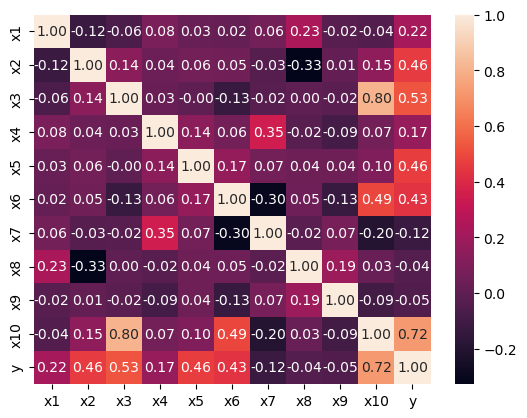

In [8]:
corr = reg2_df.corr() # will take the correlation of all columns in the dataframe

# make correlation matrix
sns.heatmap(corr, annot=True, fmt = '.2f') # annotate says to write the numbers on the heatmap, fmt is the format of the numbers
plt.show()
# looking for the ones that are highly correlated with y, but not with each other
# can see that x10 is correlated to x3 and x6, so probably redundant

In [11]:
#candidate_idx = [0,1,2,3,4,5,9]
candidate_idx = [0,1,2,3,4,5]

Z = X[:, candidate_idx]
Z_names = [column_names[idx] for idx in candidate_idx]

Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2)

model_LR = LinearRegression()
model_LR.fit(Z_train, y_train)

Z_pred = model_LR.predict(Z_train)

R2_train = model_LR.score(Z_train, y_train) # R^2 value
R2_test = model_LR.score(Z_test, y_test) # R^2 value
mse_train = mean_squared_error(y_train, Z_pred)

print(f'R2_train {R2_train:.2f}') 
print(f'R2_test {R2_test:.2f}')
print(f'MSE Train: {mse_train:.2f}')

R2_train 0.89
R2_test 0.78
MSE Train: 8.47


In [10]:
print_model(bias, coef, column_names, model_name = 'True Model')
print_model(model_LR.intercept_, model_LR.coef_, Z_names, model_name = 'Fit Model')

True Model:
 y = -15.62 + 55.43*x1 + 77.93*x2 + 94.15*x3 + 16.29*x4 + 57.11*x5 + 79.90*x6
Fit Model:
 y = -15.36 + 58.45*x1 + 76.58*x2 + 104.24*x3 + 9.70*x4 + 56.35*x5 + 77.20*x6


#### Your written answers here

What are your model parameters?
 - y = -15.39 + 56.73*x1 + 73.07*x2 + 99.43*x3 + 5.42*x4 + 60.06*x5 + 74.41*x6

Which features (x1, x2...) were significant? Which were co-linear?
 - x1, x2, x3, x4, x5, x6, and x10 were significant. 
 - x3 and x6 are co-linear because they related to x10
 
What were your MSE and R^2?
 - MSE = 8.47
 - $R^2$ = 0.89



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [21]:
housing_df = pd.read_csv('kc_house_data.csv')

housing_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


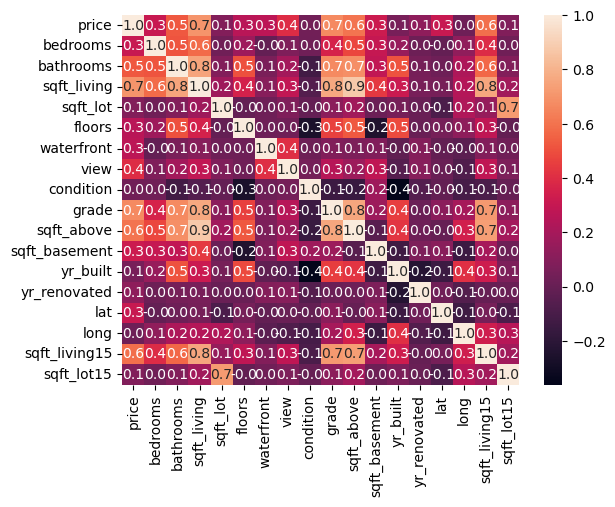

In [22]:
# Your code here. Add cells as needed.
# get ride of unecessary columns
corr_df = housing_df[['price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','lat', 'long', 'sqft_living15', 'sqft_lot15']]

corrH = corr_df.corr() # will take the correlation of all columns in the dataframe

# make correlation matrix
sns.heatmap(corrH, annot=True, fmt = '.1f') 
plt.show()


In [23]:
# create dataset of only three features
features = ['sqft_living', 'bathrooms', 'grade']
x = housing_df[features]
y = housing_df[['price']]

# create train, test, split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # leaves 80% for training and 20% for testing
# have 80% for training because we want to train the model on a large amount of data and assume that it is accurate for the entire dataset

# standardize the feature data
scaler = StandardScaler()
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_test = scaler.transform(x_test) # don't fit the test data, only transform because we want the 20% left out to test the model later
x_scaled_train = pd.DataFrame(x_scaled_train, columns = features) # not really necessary but helps with visualization
x_scaled_train

,sqft_living,bathrooms,grade
0,1.608369,0.498611,1.134370
1,-0.908982,-0.796561,-1.406427
2,-0.530839,0.498611,-0.559494
3,-0.757725,-1.444147,-1.406427
4,-0.628076,-1.444147,-0.559494
...,...,...,...
17285,0.495549,1.146197,0.287438
17286,0.571177,0.498611,1.134370
17287,-0.800941,-0.796561,0.287438
17288,1.305855,1.793783,1.134370


In [24]:
# create linear regression model
model = LinearRegression()
model.fit(x_scaled_train, y_train)

# find the r^2 value
r2_train = model.score(x_scaled_train, y_train)
r2_test = model.score(x_scaled_test, y_test)
print(f'R2_train {r2_train:.2f}') 
print(f'R2_test {r2_test:.2f}')

R2_train 0.54
R2_test 0.53


c:\Users\kataa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


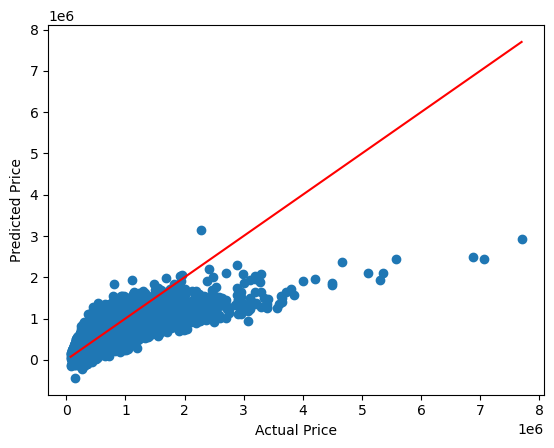

In [25]:
# plot the predicted prices versus the actual prices with line for correlation
y_pred = model.predict(x_scaled_train)
plt.scatter(y_train, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

#### Your written answers here
Which features are you using and why?
 
 - We selected sqft_living, bathrooms, grade as our features. We used a heatmap of correlations to find the most correlated features

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

In [26]:
# Your code here. Add cells as needed.
from sklearn.linear_model import Lasso, Ridge
# Your code here. Add cells as needed.
yL = housing_df['price']
xL = housing_df.drop(columns = ['price', 'date', 'id', 'zipcode'])
feature_names = xL.columns

# train test split
x_trainL, x_testL, y_trainL, y_testL = train_test_split(xL, yL, test_size=0.2)

# standardize the feature data
scalerL = StandardScaler()
x_scaled_trainL = scalerL.fit_transform(x_trainL)
x_scaled_testL = scalerL.transform(x_testL) 

# create Lasso model
model_lasso = Lasso(alpha = 10000, max_iter = 10000)
model_lasso.fit(x_scaled_trainL, y_trainL)

# calculate r^2 value
r2_trainL = model_lasso.score(x_scaled_trainL, y_trainL)
r2_trainL

0.6852206875040913

In [27]:
# print_model(model_lasso.intercept_, model_lasso.coef_, feature_names)

coef_idx_sort = np.argsort(abs(model_lasso.coef_))

# print only the last 3 coefficients (the 3 highest)
for idx in coef_idx_sort[-3:]:
    print(f'{feature_names[idx]}: {model_lasso.coef_[idx]}')

lat: 72371.71844709603
grade: 119860.02145005709
sqft_living: 137647.14689016496


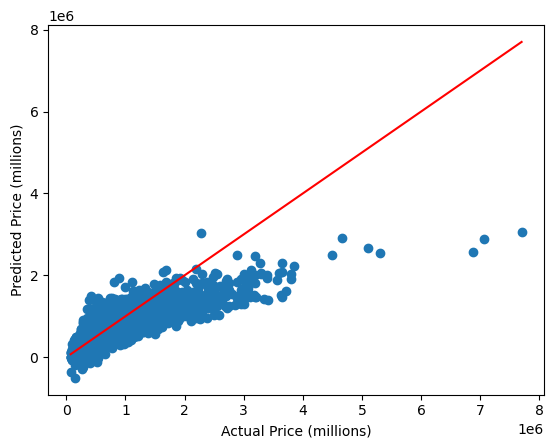

In [28]:
# plot the predicted prices versus the actual home prices with line for correlation
y_predL = model_lasso.predict(x_scaled_trainL)
plt.scatter(y_trainL, y_predL)
plt.plot([yL.min(), yL.max()], [yL.min(), yL.max()], color = 'red')
plt.xlabel('Actual Price (millions)')
plt.ylabel('Predicted Price (millions)')
plt.show()

### Your written answers here
Which regression did you use?
 - Lasso Regression

Does your regularized model look better than your MLR? How so?
 - The model looks slightly better than the MLR. It fits the line marginally better with the predicted prices rising at a level slightly closer to the accurate price but it is still very far off on the most expensive houses

### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

In [31]:
# Your code here. Add cells as needed.
# separate the data into more or less than $1M price
housing_high = housing_df[housing_df['price'] > 1e6]
housing_low = housing_df[housing_df['price'] <= 1e6]

# divide into y and x
y_high = housing_high['price']
x_high = housing_high.drop(columns = ['price', 'date', 'id', 'zipcode'])   
y_low = housing_low['price']
x_low = housing_low.drop(columns = ['price', 'date', 'id', 'zipcode']) 

# train test split
x_train_high, x_test_high, y_train_high, y_test_high = train_test_split(x_high, y_high, test_size=0.2)
x_train_low, x_test_low, y_train_low, y_test_low = train_test_split(x_low, y_low, test_size=0.2)

# standardize the feature data
## high
scaler_high = StandardScaler()
x_scaled_train_high = scaler_high.fit_transform(x_train_high)
x_scaled_test_high = scalerL.transform(x_test_high) 
## low
scaler_low = StandardScaler()
x_scaled_train_low = scaler_low.fit_transform(x_train_low)
x_scaled_test_low = scalerL.transform(x_test_low)

In [32]:
# create Lasso regressions
model_lasso_high = Lasso(alpha = 50, max_iter = 10000)
model_lasso_high.fit(x_scaled_train_high, y_train_high)
model_lasso_low = Lasso(alpha = 50, max_iter = 10000)
model_lasso_low.fit(x_scaled_train_low, y_train_low)

# calculate r^2 values
r2_train_high = model_lasso_high.score(x_scaled_train_high, y_train_high)
r2_train_low = model_lasso_low.score(x_scaled_train_low, y_train_low)

print(f'R2 high prices: {r2_train_high:.2f}')
print(f'R2 low prices: {r2_train_low:.2f}')


R2 high prices: 0.53
R2 low prices: 0.69


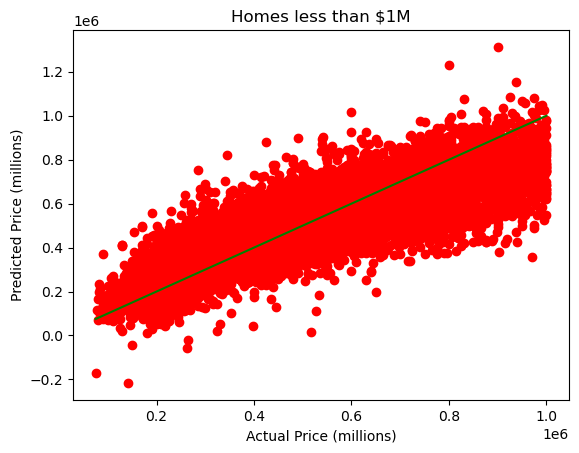

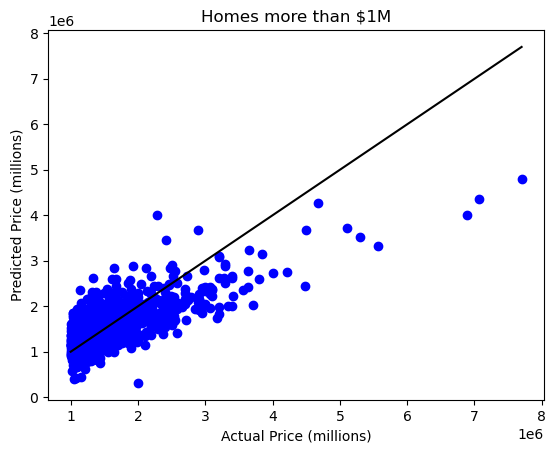

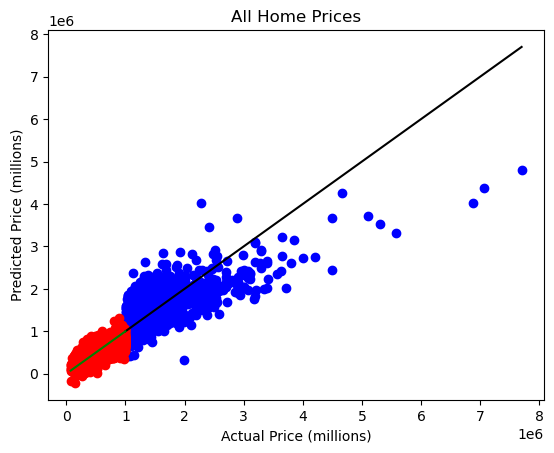

In [33]:
# plot the predicted prices versus the actual home prices with line for correlation
y_pred_high = model_lasso_high.predict(x_scaled_train_high)
y_pred_low = model_lasso_low.predict(x_scaled_train_low)


# plot low prices
plt.scatter(y_train_low, y_pred_low, color = 'red')
plt.plot([y_low.min(), y_low.max()], [y_low.min(), y_low.max()], color = 'green')
plt.xlabel('Actual Price (millions)')
plt.ylabel('Predicted Price (millions)')
plt.title('Homes less than $1M')
plt.show()

# plot high prices
plt.scatter(y_train_high, y_pred_high, color = 'blue')
plt.plot([y_high.min(), y_high.max()], [y_high.min(), y_high.max()], color = 'black')
plt.xlabel('Actual Price (millions)')
plt.ylabel('Predicted Price (millions)')
plt.title('Homes more than $1M')
plt.show()

# plot both on same graph
plt.scatter(y_train_high, y_pred_high, color = 'blue')
plt.plot([y_high.min(), y_high.max()], [y_high.min(), y_high.max()], color = 'black')
plt.scatter(y_train_low, y_pred_low, color = 'red')
plt.plot([y_low.min(), y_low.max()], [y_low.min(), y_low.max()], color = 'green')
plt.xlabel('Actual Price (millions)')
plt.ylabel('Predicted Price (millions)')
plt.title('All Home Prices')
plt.show()

 ### Your written answers here

 What are the $R^2$ for the two models?

  - The $R^2$ for the <$1M houses model is 0.69 while the $R^2$ for the >$1M houses is 0.52
 
 
